In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy.stats as stats
import random
import pickle

img_dir = '../slides/images/'
pop_dir = '../pop_data/'

fname = '01l_100'
img_name = img_dir + fname + '.pdf'

In [12]:
sufix = ['', '_sel', '_cross', '_mut', '_cr_mut']
fnames = { fname+s : pop_dir+fname+s+'.dat' for s in sufix}
inames = { fname+s : img_dir+fname+s+'.pdf' for s in sufix}

fnames['10r_100'] = pop_dir+'10r_100.dat'
inames['10r_100'] = img_dir+'10r_100.pdf'

fnames['20r_100'] = pop_dir+'20r_100.dat'
inames['20r_100'] = img_dir+'20r_100.pdf'

fnames['30r_100'] = pop_dir+'30r_100.dat'
inames['30r_100'] = img_dir+'30r_100.pdf'

print fnames

{'30r_100': '../pop_data/30r_100.dat', '01l_100_mut': '../pop_data/01l_100_mut.dat', '01l_100_cr_mut': '../pop_data/01l_100_cr_mut.dat', '01l_100_sel': '../pop_data/01l_100_sel.dat', '20r_100': '../pop_data/20r_100.dat', '01l_100_cross': '../pop_data/01l_100_cross.dat', '10r_100': '../pop_data/10r_100.dat', '01l_100': '../pop_data/01l_100.dat'}


In [13]:
fit_dict = dict()
for key, value in fnames.iteritems():
    with open(value, 'r') as pic_file:
        fit_dict[key] = np.array([ch[0] for ch in pickle.load(pic_file)])
print '\n'.join([str((k,v)) for k,v in fnames.iteritems()])

('30r_100', '../pop_data/30r_100.dat')
('01l_100_mut', '../pop_data/01l_100_mut.dat')
('01l_100_cr_mut', '../pop_data/01l_100_cr_mut.dat')
('01l_100_sel', '../pop_data/01l_100_sel.dat')
('20r_100', '../pop_data/20r_100.dat')
('01l_100_cross', '../pop_data/01l_100_cross.dat')
('10r_100', '../pop_data/10r_100.dat')
('01l_100', '../pop_data/01l_100.dat')


In [310]:
fit_dict['30r_100']

array([ 12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82, 

114.4011
100
Saving at ../slides/images/01_100.pdf


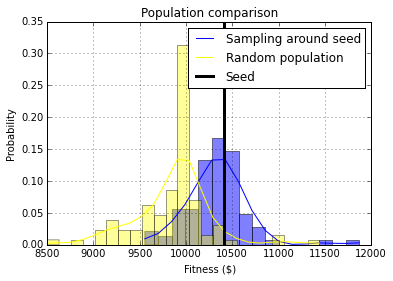

In [25]:
f = [1,0,0,0,0]
f += [0,0,0,1]
leg_label = []
legs = []
legs_aux = []

if f[0]:
    fitness = fit_dict[fname]/100.
    fitness = fitness[fitness!=0]
    y, bins, patches = plt.hist(fitness, bins='auto', normed=True, facecolor='blue', alpha=0.5)
    density = stats.gaussian_kde(fitness)
    aux, = plt.plot(bins,density(bins),'-', color='blue', label='bla')
    legs_aux.append(aux)
    leg_label.append('Sampling around seed')  

if f[1]:
    fitness = fit_dict[fname+'_sel']/100.
    y, bins, patches = plt.hist(fitness, bins='auto', normed=True, facecolor='green', alpha=0.4)
    density = stats.gaussian_kde(fitness)
    aux, = plt.plot(bins,density(bins),'-', color='green')
    legs_aux.append(aux)
    leg_label.append('Selection')

if f[2]:
    fitness = fit_dict[fname+'_cross']/100.
    y, bins, patches = plt.hist(fitness, bins=bins, normed=1, facecolor='red', alpha=0.4)
    density = stats.gaussian_kde(fitness)
    aux, = plt.plot(bins,density(bins),'-', color='red')
    legs_aux.append(aux)
    leg_label.append('Crossover')

if f[3]:
    fitness = fit_dict[fname+'_mut']/100.
    with open(pop_dir+'01l_100_mut.dat10', 'r') as pic_file:
        fitness = np.array([ch[0] for ch in pickle.load(pic_file)]) / 100
    y, bins, patches = plt.hist(fitness, bins=bins, normed=True, facecolor='c', alpha=0.4)
    density = stats.gaussian_kde(fitness)
    aux, = plt.plot(bins,density(bins),'-', color='c')
    legs_aux.append(aux)
    leg_label.append('Mutation')
    
if f[4]:
    #fitness = fit_dict[fname+'_cr_mut']/100.
    with open(pop_dir + '01l_100_cr_mut.dat10') as pic_file:
        fitness = np.array([ch[0] for ch in pickle.load(pic_file)]) / 100
    fitness = fitness[fitness!=0]
    y, bins, patches = plt.hist(fitness, bins='auto', normed=True, facecolor='m', alpha=0.5)
    density = stats.gaussian_kde(fitness)
    aux, = plt.plot(bins,density(bins),'-', color='m')
    legs_aux.append(aux)
    leg_label.append('Cross + Mut')
    
if f[5]:
    fitness = fit_dict['10r_100']/100.
    y, bins, patches = plt.hist(fitness, bins=20, normed=True, facecolor='m', alpha=0.5)
    density = stats.gaussian_kde(fitness)
    aux, = plt.plot(bins,density(bins),'-', color='m')
    legs_aux.append(aux)
    leg_label.append('10th gen')

if f[6]:
    fitness = fit_dict['20r_100']/100.
    y, bins, patches = plt.hist(fitness, bins=20, normed=True, facecolor='m', alpha=0.5)
    density = stats.gaussian_kde(fitness)
    aux, = plt.plot(bins,density(bins),'-', color='m')
    legs_aux.append(aux)
    leg_label.append('20th gen')
    
if f[7]:
    fitness = fit_dict['30r_100']/100.
    print max(fitness)
    y, bins, patches = plt.hist(fitness, bins=20, normed=True, facecolor='m', alpha=0.5)
    density = stats.gaussian_kde(fitness)
    aux, = plt.plot(bins,density(bins),'-', color='m')
    legs_aux.append(aux)
    leg_label.append('30th gen')

if f[8]:
    #with open(pop_dir+'01r_1000.dat', 'r') as pic_file:
    #with open(pop_dir+'01l_100_cr_sel.dat10', 'r') as pic_file:
    with open(pop_dir+'01r_100.dat', 'r') as pic_file:
        fitness = np.array([ch[0] for ch in pickle.load(pic_file)]) / 100
    print max(fitness)
    #fitness = fitness[fitness != 0]
    print len(fitness)
    y, bins, patches = plt.hist(fitness, bins='auto', normed=True, facecolor='yellow', alpha=0.4)
    density = stats.gaussian_kde(fitness)
    aux, = plt.plot(bins,density(bins),'-', color='yellow')
    legs_aux.append(aux)
    leg_label.append('Random population')
    #leg_label.append('Cross + Sel')

aux = plt.axvline(x=104.0829, color='black', linewidth=3)
legs_aux.append(aux)
leg_label.append('Seed')
    
for i in range(len(leg_label)):
    if i == 0:
        legs.append(legs_aux[0])
    else:
        legs.append(tuple([legs_aux[j] for j in range(i+1)]))
#print legs

    
plt.legend(legs, leg_label, loc=1)

plt.grid()
plt.title('Population comparison')
plt.ylabel('Probability')
plt.xlabel('Fitness ($)')

#bincenters = 0.5*(bins[1:]+bins[:-1])
#plt.plot(bincenters,y,'--')

ticks = np.arange(85, 121, 5)
#ticks = np.arange(100, 121, 2)
#ticks = np.arange(90, 116, 5)
#ticks = np.arange(0, 121, 20)
labels = [i*100 for i in ticks]
plt.xticks(ticks, labels)

axes = plt.gca()
#axes.set_xlim([110,120])
#axes.set_ylim([0,0.10])

plt.subplots_adjust(left=0.15)
#img_name = inames[fname+'_cr_mut']
img_name = img_dir + '01_100.pdf'
#img_name = img_dir + '01r_1000_sel.pdf'
print "Saving at", img_name
plt.savefig(img_name)
plt.show()

In [30]:
print fitness

[ 1152.997  1134.891  1087.615  1076.938  1075.223  1073.068  1071.706
  1070.757  1069.822  1069.719  1069.719  1069.719  1068.019  1064.7
  1063.977  1061.673  1057.722  1057.435  1057.435  1055.747  1055.747
  1052.751  1052.613  1052.613  1052.045  1051.744  1051.744  1051.6
  1050.813  1050.813  1050.752  1050.661  1050.072  1048.682  1048.348
  1048.24   1048.147  1048.147  1047.984  1047.253  1047.237  1046.464
  1044.391  1043.59   1042.382  1042.277  1041.256  1041.146  1040.477
  1040.314  1040.142  1039.966  1039.322  1038.861  1038.578  1038.225
  1037.721  1037.594  1037.555  1037.495  1037.312  1036.624  1035.891
  1035.084  1034.925  1033.384  1033.363  1033.283  1032.422  1032.007
  1030.799  1028.995  1028.733  1028.685  1028.651  1028.076  1025.354
  1024.427  1023.807  1022.768  1022.768  1018.87   1018.87   1017.628
  1017.008  1016.134  1010.477  1010.294  1009.466  1009.151  1007.187
  1002.561  1001.809  1000.954   999.034   997.819   995.002   992.213
   956.086